## Import libraries

In [1]:
import pandas as pd 
import numpy as np

## Define the cost alpha and weight

This implemenation is needed to compute the cost and update the weights through the loops:

**Erreur :**
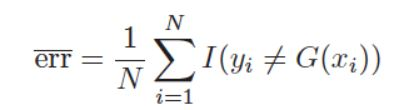

**Alpha :**
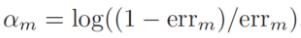

**Weights :**
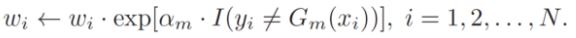

In [2]:
def error(y, y_pred, wi):
    return (sum(wi * (np.not_equal(y, y_pred)).astype(int)))/sum(wi)

def alpha(error):
    return np.log((1 - error) / error)

def update_weights(wi, alpha, y, y_pred):
    return wi * np.exp(alpha * (np.not_equal(y, y_pred)).astype(int))

## Defining the Adaboost Class

It contains the initialisation, the fitting and the predict function.

**AdaBoost Algorithm: (source: towardsdatascience)**
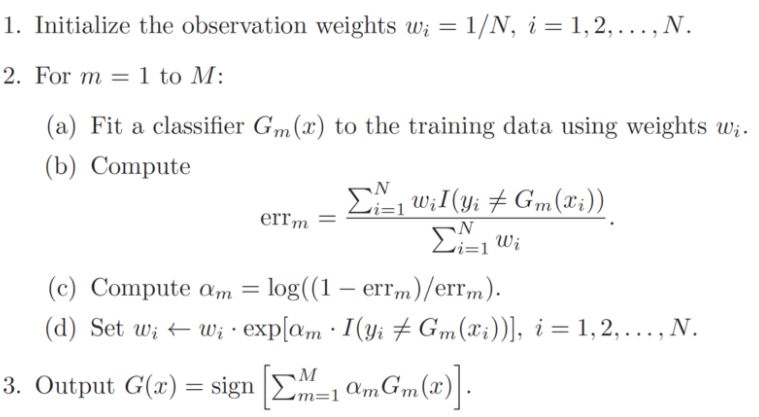

In [3]:
from sklearn.tree import DecisionTreeClassifier  

class AdaBoost:
    
    def __init__(self, boosting_round=400):              # initialize M, alphas and weights
        self.M = boosting_round
        self.alphas = []
        self.weak_learner = []

    def fit(self, X, y):      # M is the number of boosting roud
  
        for m in range(0, self.M):
            
            if m == 0:
                w_i = np.ones(len(y)) * 1 / len(y)  # Initialize of wi
            else:
                w_i = update_weights(w_i, alpha_m, y, y_pred)  # Update of wi
            
            weak_learner = DecisionTreeClassifier(max_depth = 1)     # Initialize a stump (weak learner) and train him
            weak_learner.fit(X, y, sample_weight = w_i)
            y_pred = weak_learner.predict(X)
            
            self.weak_learner.append(weak_learner) 

            error_m = error(y, y_pred, w_i)                  #Calculate the error, alpha and weight of this weak learner

            alpha_m = alpha(error_m)
            self.alphas.append(alpha_m)

        assert len(self.weak_learner) == len(self.alphas)


    def predict(self, X):
   
        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.weak_learner[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)              # Predict the sum of the weak learners

        return y_pred
      


## Testing the implementation

Let's test our algorithm on the breast cancer dataset from scikit-learn.

In [4]:
from sklearn import datasets
from sklearn.metrics import accuracy_score

dataset = datasets.load_breast_cancer()
X = dataset.data[:, :2] 
y = dataset.target
y[y==0]=-1       # Setting the 2 classes to either 1 or -1 (not 0 and 1)

model = AdaBoost(boosting_round=500)
model.fit(X,y)

preds = model.predict(X)
score = accuracy_score(preds,y)

print("The score of our AdaBoost is : "+ str(score*100)+ ' %')

The score of our AdaBoost is : 92.2671353251318 %


# Ressources

* Forumlas and the pseudo algorithm: **https://towardsdatascience.com/**
* A more detailed implementation: **https://github.com/AlvaroCorrales/AdaBoost**